This note is for building strtergy for weekly option buy  
Rules 
Version 1 

buy weekly option on Friday - Call and Put both on Future open strike price
Sell both bought options on weekly expirty at closing price 

Version 2 

buy weekly option on Monday - Call and Put both on Future open strike price
Sell both bought options on weekly expirty at closing price 



Algo Steps

using nsepy

1) find out all expirty date from 2017 (weekly options was logically good values from 2017)
2) check day (in case thursday is holiday)
3) check if options is in buy status on previous Friday 
4) yes then sell options on that day
5) if this is first time  - check next working day (logically friday )
6) Check future price on the friday 
7) identiy ATM strike price
8) Buy CE and PE for that week 
9) Go to next expiry sell both the option
10) find P&L
11) Find max draw down
12) find CAGR
14) Find AGR


In [1]:
import pandas as pd
import numpy as np
import nsepy 
import os
from datetime import datetime ,date,timedelta
import datetime
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 1000)
%matplotlib inline

In [2]:
def getExpirtyDate():
    expirty_Date  =[]
    start_date = datetime.date(2019, 4, 1)
    end_date = datetime.date(2021, 4, 30)
    delta = relativedelta(months=+1)
    while start_date <= end_date: 
        #max(nsepy.get_expiry_date(start_date.year,start_date.month)))
        #expirty_Date.extend(sorted(list(nsepy.get_expiry_date(start_date.year,start_date.month))))
        expirty_Date.append(max(nsepy.get_expiry_date(start_date.year,start_date.month)))
        start_date += delta
    return expirty_Date

def cagr(start_value, end_value, num_periods):
    return (end_value / start_value) ** (1 / (num_periods - 1)) - 1

def finddatewithvalue(future_logic_df,date_time_obj2):
    for i in range(1,6):
        #print(i)
        date_time_obj = (date_time_obj2+timedelta(days =i)).strftime('%Y-%m-%d')
        #print(future_logic_df.loc[future_logic_df['Date']== date_time_obj].empty )
        if not future_logic_df.loc[future_logic_df['Date']== date_time_obj].empty :
            return date_time_obj
        

              

In [3]:
def getStrikeValue():
    symbol = 'NIFTY'
    expiry_list = getExpirtyDate()
    previous_expiry_date = expiry_list[200]
    current_expiry_date = expiry_list[203]
    print(previous_expiry_date)
    print(current_expiry_date)
    #identiy next working day after previous expiry day
    start_date = previous_expiry_date+timedelta(days =1)
    print(start_date)

    nifty_fut = nsepy.get_history(symbol="NIFTY",
                            start=start_date,
                            end=start_date,
                            index=True,
                            futures=True,
                            expiry_date=current_expiry_date)
    print(nifty_fut)

In [4]:
database = "C:/Users/sanjo/PycharmProjects/mokshtech/stock_predictor/database/optionData"

In [5]:
    print(os.getcwd())
    print(os.listdir())
    symbol = 'NIFTY'
    banknifty = pd.DataFrame()
    formatted_banknifyt_df = pd.DataFrame(['Year_month','P&L'])
    month_profit_loss = pd.DataFrame()
    start_date = datetime.date(2019, 4, 1)
    end_date = datetime.date(2021, 4, 30)
    delta = relativedelta(years=+1)
   
    year_month_list =[]
    p_N_L_list =[]
    cum_p_N_L_list =[]
    slipage = 5
    P_N_L_dic =  {}

    while start_date <= end_date:
            val =0
            print(str(symbol)+str(start_date.year)+".csv")
            filename = str(symbol)+str(start_date.year)+".csv"
            fname = os.path.join(database,filename)
            fname_day = os.path.join(database,filename)
            df = pd.read_csv(fname)
            df = df.loc[df['SYMBOL']== symbol]
            df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
            df['Year_month'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')
            df['EXPIRY_DT'] = pd.to_datetime(df['EXPIRY_DT']).dt.strftime('%Y-%m-%d')
            df['EXPIRY_DT_Year_month'] = pd.to_datetime(df['EXPIRY_DT']).dt.strftime('%Y-%m')
            formatted_banknifyt_df = df[ df['Year_month'] == df['EXPIRY_DT_Year_month'] ]
            banknifty = banknifty.append(df)
            start_date += delta

    banknifty_option_df = banknifty[banknifty['INSTRUMENT']=='OPTIDX']
    banknifty_fut_df = banknifty[banknifty['INSTRUMENT']=='FUTIDX']
    
    

print(banknifty_fut_df)

C:\Users\sanjo\PycharmProjects\mokshtech\stock_predictor\optionvaluecalculation\strategies
['.ipynb_checkpoints', 'df.csv', 'forwordvolatility.py', 'input.csv', 'monthlyoptionbuying.ipynb', 'NIFTY.csv', 'preDefinedStrategies', 'straddle.py', 'strategies.py', 'weeklyOptionBuy.ipynb', 'weekly_nifty_option_buy_Pandl.csv', '__init__.py']
NIFTY2019.csv
NIFTY2020.csv
NIFTY2021.csv
              Date INSTRUMENT SYMBOL   EXPIRY_DT  STRIKE_PR OPTION_TYP      OPEN  ...  SETTLE_PR  CONTRACTS  VAL_INLAKH    OPEN_INT  CHG_IN_OI  Year_month  EXPIRY_DT_Year_month
0       2019-01-01     FUTIDX  NIFTY  2019-01-31        0.0         XX  10909.95  ...   10960.55    88310.0   722018.74  23345700.0   -50250.0     2019-01               2019-01
1       2019-01-01     FUTIDX  NIFTY  2019-02-28        0.0         XX  10953.30  ...   10995.65     1783.0    14626.54    534150.0    -6150.0     2019-01               2019-02
2       2019-01-01     FUTIDX  NIFTY  2019-03-28        0.0         XX  10935.15  ...   110

In [6]:

option_expiry_date_list = banknifty_option_df.EXPIRY_DT.unique()

#future_logic_df = banknifty_fut_df [banknifty_fut_df['Date'].isin(option_expiry_date_list)]
future_logic_df = banknifty_fut_df 
future_logic_df['str_pric_iden'] = (future_logic_df['OPEN']- (future_logic_df['OPEN'])%100).astype(int)

option_Df = banknifty_option_df[(banknifty_option_df['Date'].isin(option_expiry_date_list)) &
                                banknifty_option_df['STRIKE_PR'].isin(future_logic_df.str_pric_iden.unique()) ]
option_Df_group = option_Df.groupby('Date')


for name, group in option_Df_group :
    #print(name)
    index = sorted(option_expiry_date_list.tolist()).index(name)
    next_expiry = sorted(option_expiry_date_list.tolist())[index+1]
    #print("next_expiry" ,option_expiry_date_list.tolist()[index+1])(date_time_obj+timedelta(days =1)).strftime('%Y-%m-%d')
    date_time_obj = datetime.datetime.strptime(name,'%Y-%m-%d')
    #date_time_obj = (date_time_obj+timedelta(days =1)).strftime('%Y-%m-%d')
    date_time_obj = finddatewithvalue(future_logic_df,date_time_obj)
    #print("buy date",date_time_obj)
    strike_price = future_logic_df.loc[future_logic_df['Date']== date_time_obj]['str_pric_iden'].min()
    #print("strike_price",strike_price)
    
    buy_df = banknifty_option_df.loc[(banknifty_option_df['STRIKE_PR']== strike_price)
                         &  (banknifty_option_df['Date']==date_time_obj)
                         &  (banknifty_option_df['EXPIRY_DT']==next_expiry )
                        ]
    sell_df= banknifty_option_df.loc[(banknifty_option_df['STRIKE_PR']== strike_price)
                         &  (banknifty_option_df['Date']==next_expiry)
                         &  (banknifty_option_df['EXPIRY_DT']==next_expiry )
                        ]
    ce_buy = buy_df.loc[buy_df['OPTION_TYP']=='CE']['OPEN'].min()
    ce_sell = sell_df.loc[sell_df['OPTION_TYP']=='CE']['CLOSE'].min()
    pe_buy = buy_df.loc[buy_df['OPTION_TYP']=='PE']['OPEN'].min()
    pe_sell = sell_df.loc[sell_df['OPTION_TYP']=='PE']['CLOSE'].min()
    
    pandl = (ce_sell-ce_buy)+(pe_sell-pe_buy)
    pandl = pandl - abs(pandl*slipage/100)
    if cum_p_N_L_list:
               # print("inlistelse ",val)
                val = cum_p_N_L_list[-1]        
    if not np.isnan(pandl):  
        p_N_L_list.append(pandl)
        cum_p_N_L_list.append(val+pandl)   
        year_month_list.append(next_expiry)
        P_N_L_dic.update({next_expiry :[date_time_obj,next_expiry,strike_price,ce_buy,pe_buy,ce_sell,pe_sell,ce_sell-ce_buy,
                                        pe_sell-pe_buy,pandl,val+pandl]})
    else:
        print("NAN number", date_time_obj,next_expiry)
    #print( ce_buy,ce_sell,pe_buy,pe_sell,"")
    #print("PNL",pandl)
    #print(p_N_L_list)
    #print(cum_p_N_L_list)
    #print(len(year_month_list))
    #print(P_N_L_dic)
month_profit_loss['Year_month'] = pd.Series(year_month_list)
month_profit_loss['P&L'] = pd.Series(p_N_L_list)
month_profit_loss['cum_P&L'] = pd.Series(cum_p_N_L_list)
week_profit_loss = pd.DataFrame(P_N_L_dic)
week_profit_loss = week_profit_loss.transpose()
week_profit_loss.columns =['Buy_date','Sell_Date','Strike_price','Call__buy_price','Put_buy_price','Call_sell_price',
                           'Put_sell_price','Call_PandL','Put_PandL','Total_PandL','Cum_PandL']
print(week_profit_loss)

    


<ipython-input-6-df7f110389cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_logic_df['str_pric_iden'] = (future_logic_df['OPEN']- (future_logic_df['OPEN'])%100).astype(int)


NAN number 2019-02-01 2019-02-14
NAN number 2019-03-29 2019-04-04
NAN number 2021-04-16 2021-04-22
              Buy_date   Sell_Date Strike_price Call__buy_price Put_buy_price Call_sell_price Put_sell_price Call_PandL Put_PandL Total_PandL Cum_PandL
2019-02-21  2019-02-15  2019-02-21        10800            73.0          85.0            0.45           11.0     -72.55     -74.0   -153.8775 -153.8775
2019-02-28  2019-02-22  2019-02-28        10700           144.0         45.05            89.5            0.1      -54.5    -44.95   -104.4225    -258.3
2019-03-07  2019-03-01  2019-03-07        10800          117.45         68.65          250.05           0.05      132.6     -68.6        60.8    -197.5
2019-03-14  2019-03-08  2019-03-14        11000           93.05         50.05          330.35           0.05      237.3     -50.0     177.935   -19.565
2019-03-20  2019-03-15  2019-03-20        11300          107.65          43.7          220.35           0.05      112.7    -43.65     65.5975

In [7]:
month_profit_loss

,Year_month,P&L,cum_P&L
0,2019-02-21,-153.8775,-153.8775
1,2019-02-28,-104.4225,-258.3000
2,2019-03-07,60.8000,-197.5000
3,2019-03-14,177.9350,-19.5650
4,2019-03-20,65.5975,46.0325
5,2019-03-28,-106.7325,-60.7000
6,2019-05-09,251.5125,190.8125
7,2019-05-16,-167.9475,22.8650
8,2019-05-23,-33.1275,-10.2625
9,2019-05-30,-3.2550,-13.5175


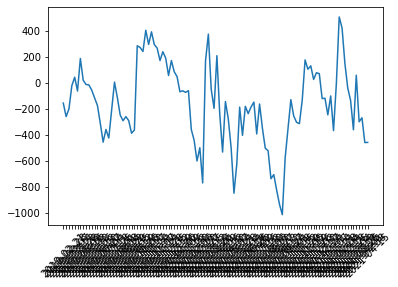

In [8]:
#plt.figure(figsize=(20,10))
plt.xticks(rotation=45)

plt.plot(week_profit_loss['Sell_Date'], week_profit_loss['Cum_PandL'])
plt.show()
#plt.figure(figsize=(20,10))


In [9]:

week_profit_loss['Year'] = pd.to_datetime(week_profit_loss['Sell_Date']).dt.strftime('%Y')
grp = week_profit_loss.groupby(['Year'])

print(len(grp['Total_PandL'].sum()))   
total_period = len(grp['Total_PandL'].sum())
start_val = grp['Total_PandL'].sum()[0]
end_val= grp['Total_PandL'].sum()[total_period-1]
print(total_period,start_val,end_val)
print(cagr(start_val,end_val,total_period))

3
3 88.28499999999995 -340.83250000000015
nan


<ipython-input-2-090f39cfe7a5>:14: RuntimeWarning: invalid value encountered in double_scalars
  return (end_value / start_value) ** (1 / (num_periods - 1)) - 1


In [10]:
result = cagr(1,3913.3675,5)
print("{:.2%}".format(result))

690.93%


In [11]:
week_profit_loss.to_csv("weekly_nifty_option_buy_Pandl.csv")

In [12]:
sorted(option_expiry_date_list.tolist())

['2019-01-31',
 '2019-02-14',
 '2019-02-21',
 '2019-02-28',
 '2019-03-07',
 '2019-03-14',
 '2019-03-20',
 '2019-03-28',
 '2019-04-04',
 '2019-04-11',
 '2019-04-18',
 '2019-04-25',
 '2019-05-02',
 '2019-05-09',
 '2019-05-16',
 '2019-05-23',
 '2019-05-30',
 '2019-06-06',
 '2019-06-13',
 '2019-06-20',
 '2019-06-27',
 '2019-07-04',
 '2019-07-11',
 '2019-07-18',
 '2019-07-25',
 '2019-08-01',
 '2019-08-08',
 '2019-08-14',
 '2019-08-22',
 '2019-08-29',
 '2019-09-05',
 '2019-09-12',
 '2019-09-19',
 '2019-09-26',
 '2019-10-03',
 '2019-10-10',
 '2019-10-17',
 '2019-10-24',
 '2019-10-31',
 '2019-11-07',
 '2019-11-14',
 '2019-11-21',
 '2019-11-28',
 '2019-12-05',
 '2019-12-12',
 '2019-12-19',
 '2019-12-26',
 '2020-01-02',
 '2020-01-09',
 '2020-01-16',
 '2020-01-23',
 '2020-01-30',
 '2020-02-06',
 '2020-02-13',
 '2020-02-20',
 '2020-02-27',
 '2020-03-05',
 '2020-03-12',
 '2020-03-19',
 '2020-03-26',
 '2020-04-01',
 '2020-04-09',
 '2020-04-16',
 '2020-04-23',
 '2020-04-30',
 '2020-05-07',
 '2020-05-

108
     Year_month       P&L    cum_P&L      vix
0    2019-02-21 -153.8775  -153.8775  16.0525
1    2019-02-28 -104.4225  -258.3000  18.2775
2    2019-03-07   60.8000  -197.5000  15.2925
3    2019-03-14  177.9350   -19.5650  15.1500
4    2019-03-20   65.5975    46.0325  16.0325
5    2019-03-28 -106.7325   -60.7000  16.6525
6    2019-05-09  251.5125   190.8125  25.4850
7    2019-05-16 -167.9475    22.8650  28.3700
8    2019-05-23  -33.1275   -10.2625  19.4050
9    2019-05-30   -3.2550   -13.5175  15.6100
10   2019-06-06  -40.6350   -54.1525  15.5250
11   2019-06-13  -59.1675  -113.3200  13.6600
12   2019-06-20  -58.6950  -172.0150  14.0000
13   2019-06-27 -135.9750  -307.9900  14.6450
14   2019-07-04 -147.2625  -455.2525  13.5300
15   2019-07-11   97.8975  -357.3550  12.4700
16   2019-07-18  -66.2025  -423.5575  11.7500
17   2019-07-25  216.8375  -206.7200  12.6350
18   2019-08-01  214.7475     8.0275  14.5575
19   2019-08-08 -118.5450  -110.5175  16.0925
20   2019-08-14 -135.0300  -24

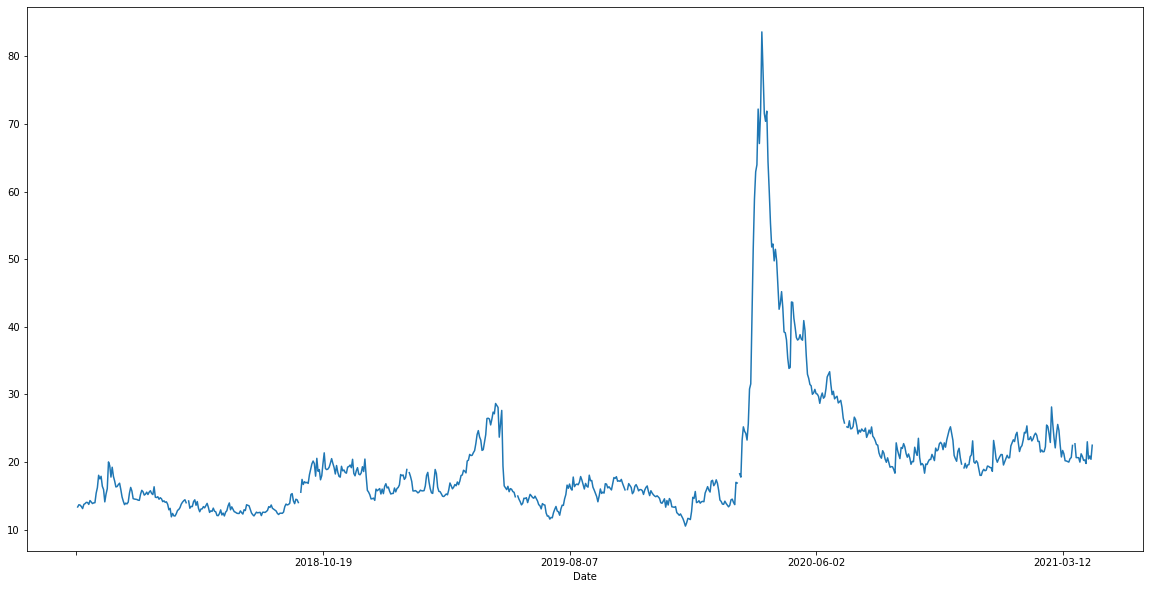

In [13]:
vix = nsepy.get_history(symbol="INDIAVIX",
            start=date(2018,1,1),
            end=date(2021,4,30),
            index=True)
plt.figure(figsize=(20,10))
vix['Close'].plot()
#print(vix.index)
#print(list(month_profit_loss['Year_month']))
vix['Date_val'] = vix.index
vix['Date_val'] =vix[['Date_val']].astype(str)
print(len(list(month_profit_loss['Year_month'])))
#print((vix[vix['Date_val'].isin(list(month_profit_loss['Year_month']))]))
val= list(vix[vix['Date_val'].isin(list(month_profit_loss['Year_month']))]['Close'])
month_profit_loss['vix']= val
print(month_profit_loss)

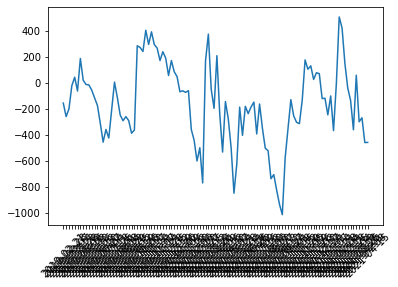

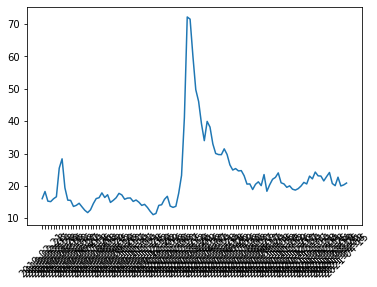

In [14]:
#plt.figure(figsize=(20,10))
plt.xticks(rotation=45)

plt.plot(month_profit_loss['Year_month'], month_profit_loss['cum_P&L'])
plt.show()
#plt.figure(figsize=(20,10))
plt.xticks(rotation=45)

plt.plot(month_profit_loss['Year_month'], month_profit_loss['vix'])
plt.show()